In [1]:
import pandas as pd

## The Dataset : Immigration to Canada from 1980 to 2013

    The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination.The data is originally about 45 countries but I will focus on Canada as part of my data visualization courses on   Coursera

### Step 1 : Data collection and analysis

In [2]:
data = pd.read_excel(open('Canada.xlsx', 'rb'),
              sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2) 
print('data downloaded')
data.head()

data downloaded


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
## Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [4]:
# removing unnecessary columns
data.drop(columns=['AREA','REG','DEV','Type','Coverage'],inplace=True)

In [5]:

# Renaming columns
data.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
data.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
# Is there null values?
data.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
dtype: int64

In [7]:
# checking if there duplicates data about countries
data['Country'].duplicated().any()

False

In [8]:
#setting country as index
data.set_index('Country',inplace=True)
#convert columns into string type 
data.columns = list(map(str, data.columns))

In [9]:
# adding a new column Total that sum up the total immigrants by country over the period 1980-2013
data['Total'] = data.sum(axis=1)

C:\Users\kékéli AFONOUVI\AppData\Local\Temp\ipykernel_2212\1486421495.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Total'] = data.sum(axis=1)


In [10]:
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


### Step 2: Data visualization with matplotlib

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Case Study
In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. This disaster caused loss of life and 3 millions people were affected. We will visual the effort of Canada to help refugees

In [13]:
years = list(map(str,range(1980,2014)))
haiti = data.loc['Haiti',years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [14]:
def plot(dataframe: pd.DataFrame,country_name,annotation_data=None,kind='line'):
    """Ploting function"""
    dataframe.index = dataframe.index.map(int)
    
    if annotation_data:
        plt.text(annotation_data[0],annotation_data[1],annotation_data[2])
    dataframe.plot(kind=kind)
    plt.title(f'Immigration from {country_name}')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')

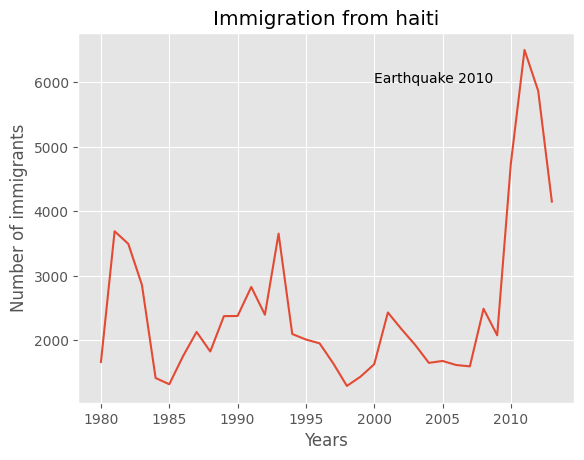

In [15]:
plot(haiti,'haiti',[2000,6000,'Earthquake 2010'])

### Casen study : Comparison of the number immigrants from India and China from 1980 ans 2013

In [16]:
'India' in data.index and 'China' in data.index

True

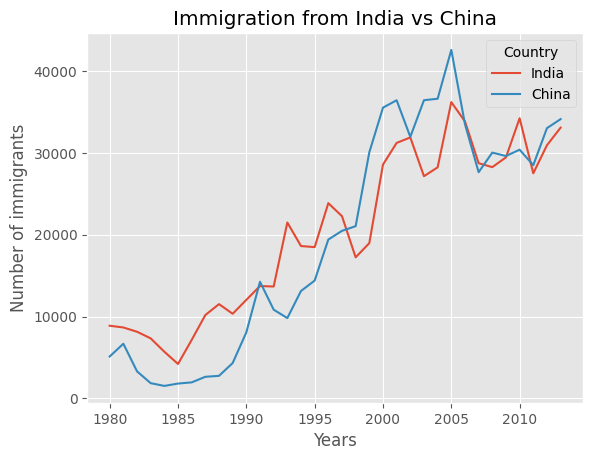

In [17]:
india_china = data.loc[['India','China'],years]
plot(india_china.transpose(),'India vs China')

### Casen study : Comparison of the 5 countries that to the immigration in Canada from 1980 ans 2013

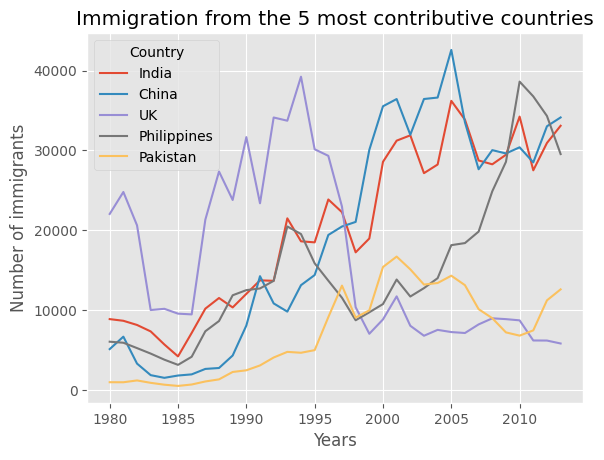

In [18]:
data.sort_values(by='Total', ascending=False, axis=0, inplace =True)
top5 = data[years].head(5)
top5_to_compare = top5.transpose()
top5_to_compare.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)
top5_to_compare.index = top5_to_compare.index.map(int)
plot(top5_to_compare,'the 5 most contributive countries')

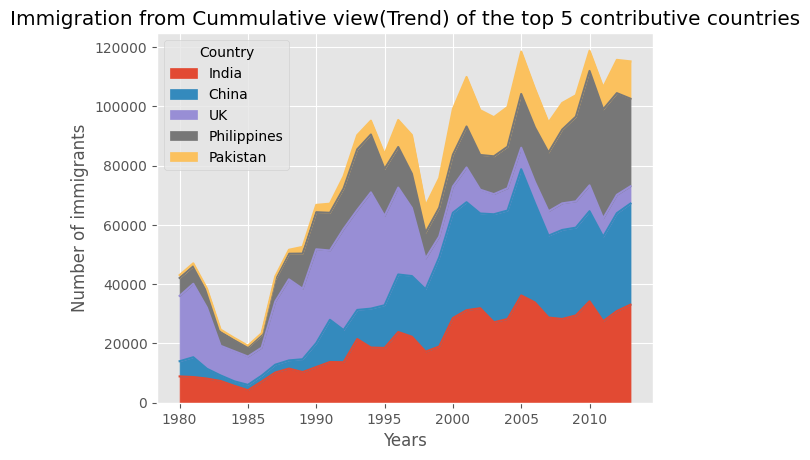

In [19]:
plot(top5_to_compare,'Cummulative view(Trend) of the top 5 contributive countries',kind='area')

### Case study : Analyze of the immigration distibution amoung 195 countries in 2013

In [20]:
import numpy as np

Text(0.5, 0, 'Numbers of immigrants')

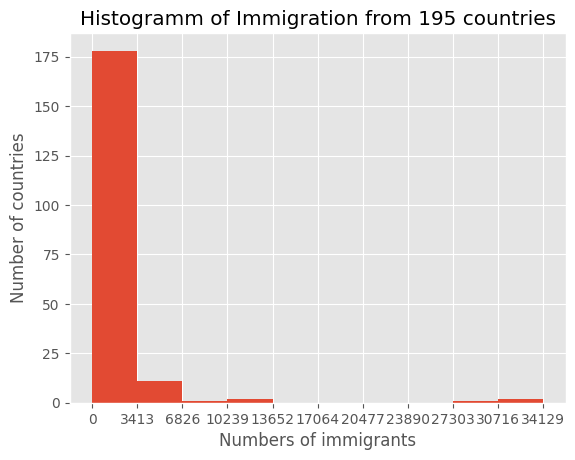

In [21]:
count, bin_edges = np.histogram(data['2013'])
#data['2013'].plot(kind='hist',xticks=bin_edges,bins=15)#aplha=0.35
data['2013'].plot(kind='hist',xticks=bin_edges)
plt.title('Histogramm of Immigration from 195 countries')
plt.ylabel('Number of countries')
plt.xlabel('Numbers of immigrants')

### Case study : Icelandic immagration to Canada from 2000 to 2013 

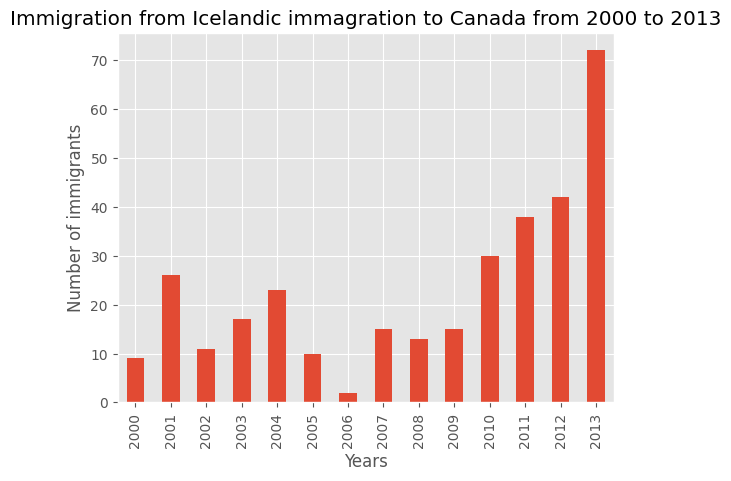

In [22]:
df_iceland = data.loc['Iceland',list(map(str,range(2000,2014)))]
plot(df_iceland,'Icelandic immagration to Canada from 2000 to 2013',kind='bar')

Text(0, 0.5, 'Years')

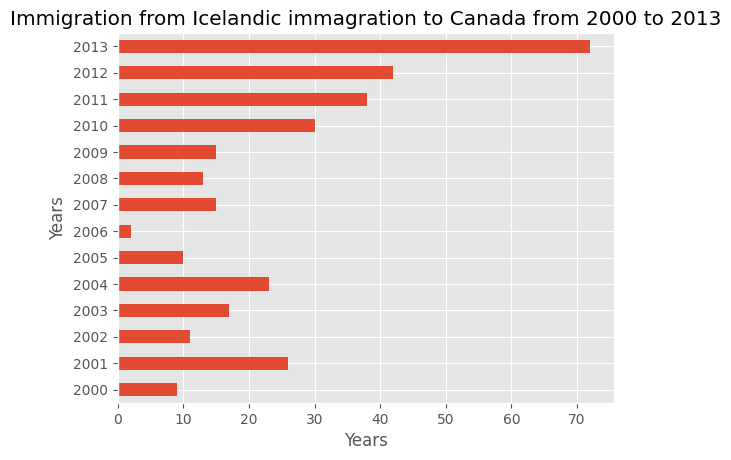

In [23]:
plot(df_iceland,'Icelandic immagration to Canada from 2000 to 2013',kind='barh')
plt.ylabel('Years')

### Case study :  Immigration to canada viewed by continent

In [24]:
df_by_continent = data.groupby('Continent',axis=0).sum()
df_by_continent.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


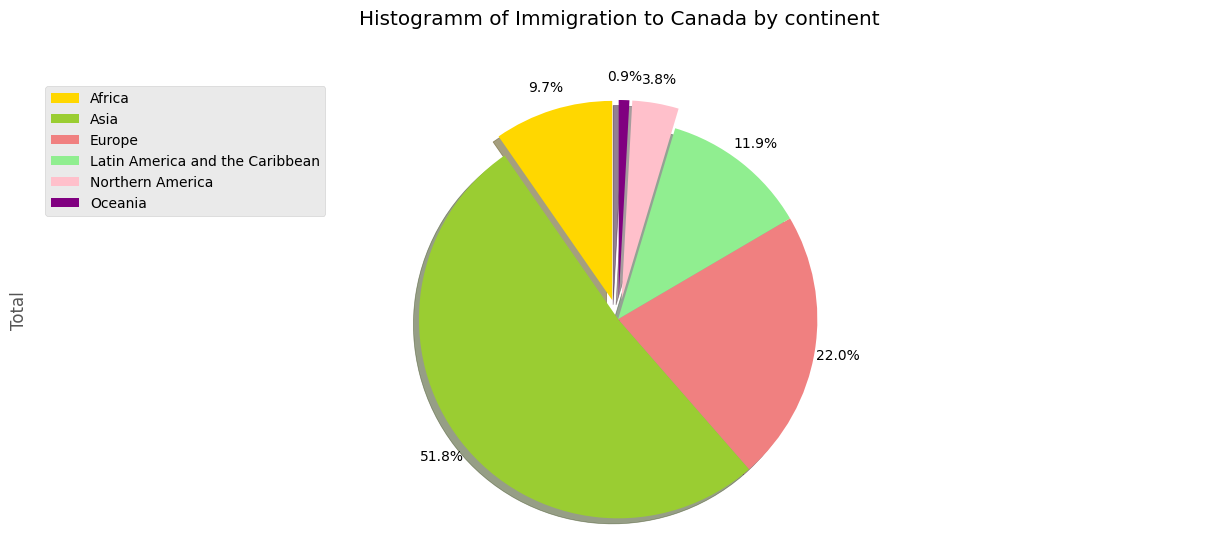

In [25]:
colors_list = ['gold','yellowgreen','lightcoral','lightgreen','pink','purple']
explode_list=[0.1,0,0,0,0.1,0.1]
df_by_continent['Total'].plot(kind='pie',
                             figsize=(15,6),
                             autopct='%1.1f%%',
                             startangle=90,
                             shadow=True,
                             labels=None,
                             pctdistance=1.12,
                             colors=colors_list,
                             explode = explode_list)
plt.title('Histogramm of Immigration to Canada by continent',y=1.1)
plt.axis('equal')
plt.legend(labels=df_by_continent.index,loc='upper left')

### Case of the study : Box plot of Japan immigration to Canada

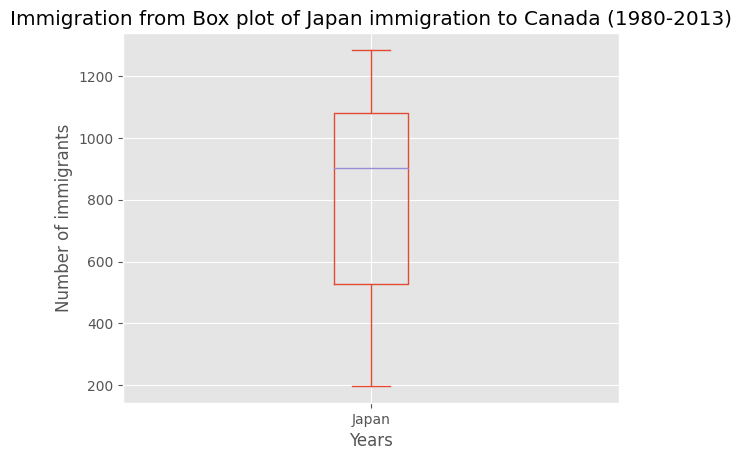

In [26]:
japan = data.loc['Japan',years].transpose()
plot(japan,'Box plot of Japan immigration to Canada (1980-2013)',kind='box')

### Case study : The relation between the year the amount of immigrants

In [27]:
df_total=pd.DataFrame({'year':range(1980,2014),'total':[data[year].sum() for year in years]})
#df_total.set_index('year',inplace=True)
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [28]:
## fiting with numpy
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

Text(2000, 150000, 'y=5567.092284186346*x+-10926195.24537804')

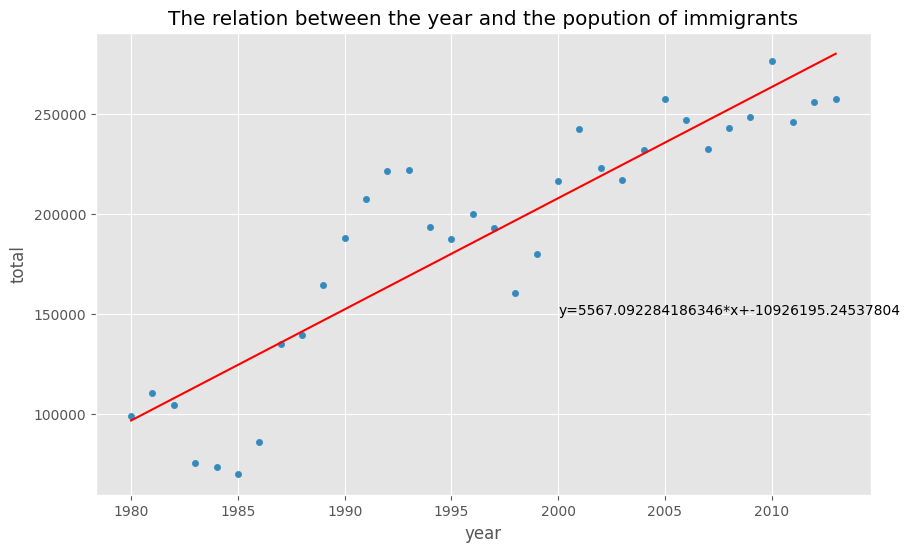

In [29]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(10,6))
plt.title('The relation between the year and the popution of immigrants')

plt.plot(x,fit[0]*x+fit[1],color='red')
plt.annotate(f'y={fit[0]}*x+{fit[1]}',xy=(2000,150000))

### Case study : Argentina suffered a great depression
We are going to analyze the effects from 1998 to 2002, we are going to analyze if there are a variation of immigration at that period and compare it to his neighbour Brazil

In [30]:
# data transpose
data_tr = data[years].transpose()
data_tr.index = map(int,data_tr.index)
data_tr.index.name='Year'
data_tr.reset_index(inplace=True)
data_tr.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [31]:
## Normalization (Method: Feature scaling)
# normalize Brazil data
norm_brazil = (data_tr['Brazil'] - data_tr['Brazil'].min()) / (data_tr['Brazil'].max() - data_tr['Brazil'].min())
# normalize Argentina data
norm_argentina = (data_tr['Argentina'] - data_tr['Argentina'].min()) / (data_tr['Argentina'].max() - data_tr['Argentina'].min())

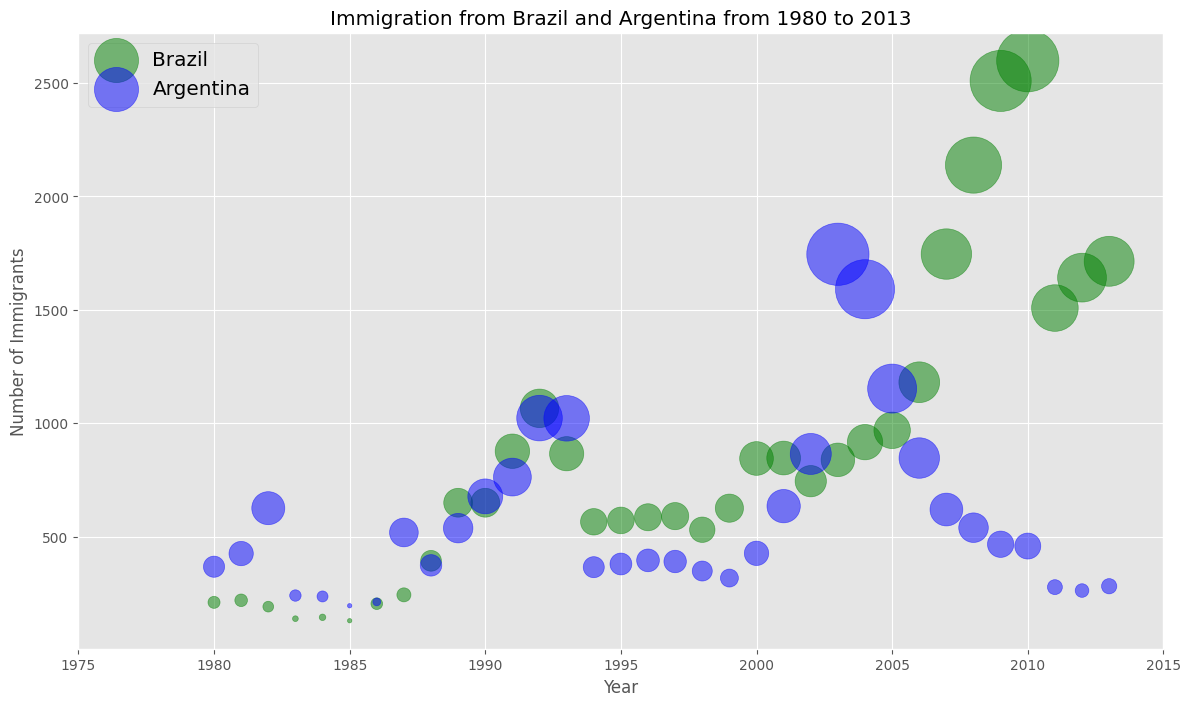

In [32]:
# Brazil
ax0 = data_tr.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )
# Argentina

ax1 = data_tr.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [33]:
def plot_on_axes(dataframe: pd.DataFrame,title_completion:str,kind='line',ax=None,onint=True):
    """Ploting function"""
    if onint:
        dataframe.index = dataframe.index.map(int)
    dataframe.plot(kind=kind,ax=ax)
    ax.set_title(f'Immigration to Canada from {title_completion}')
    ax.set_ylabel('Number of immigrants')
    ax.set_xlabel('Years')

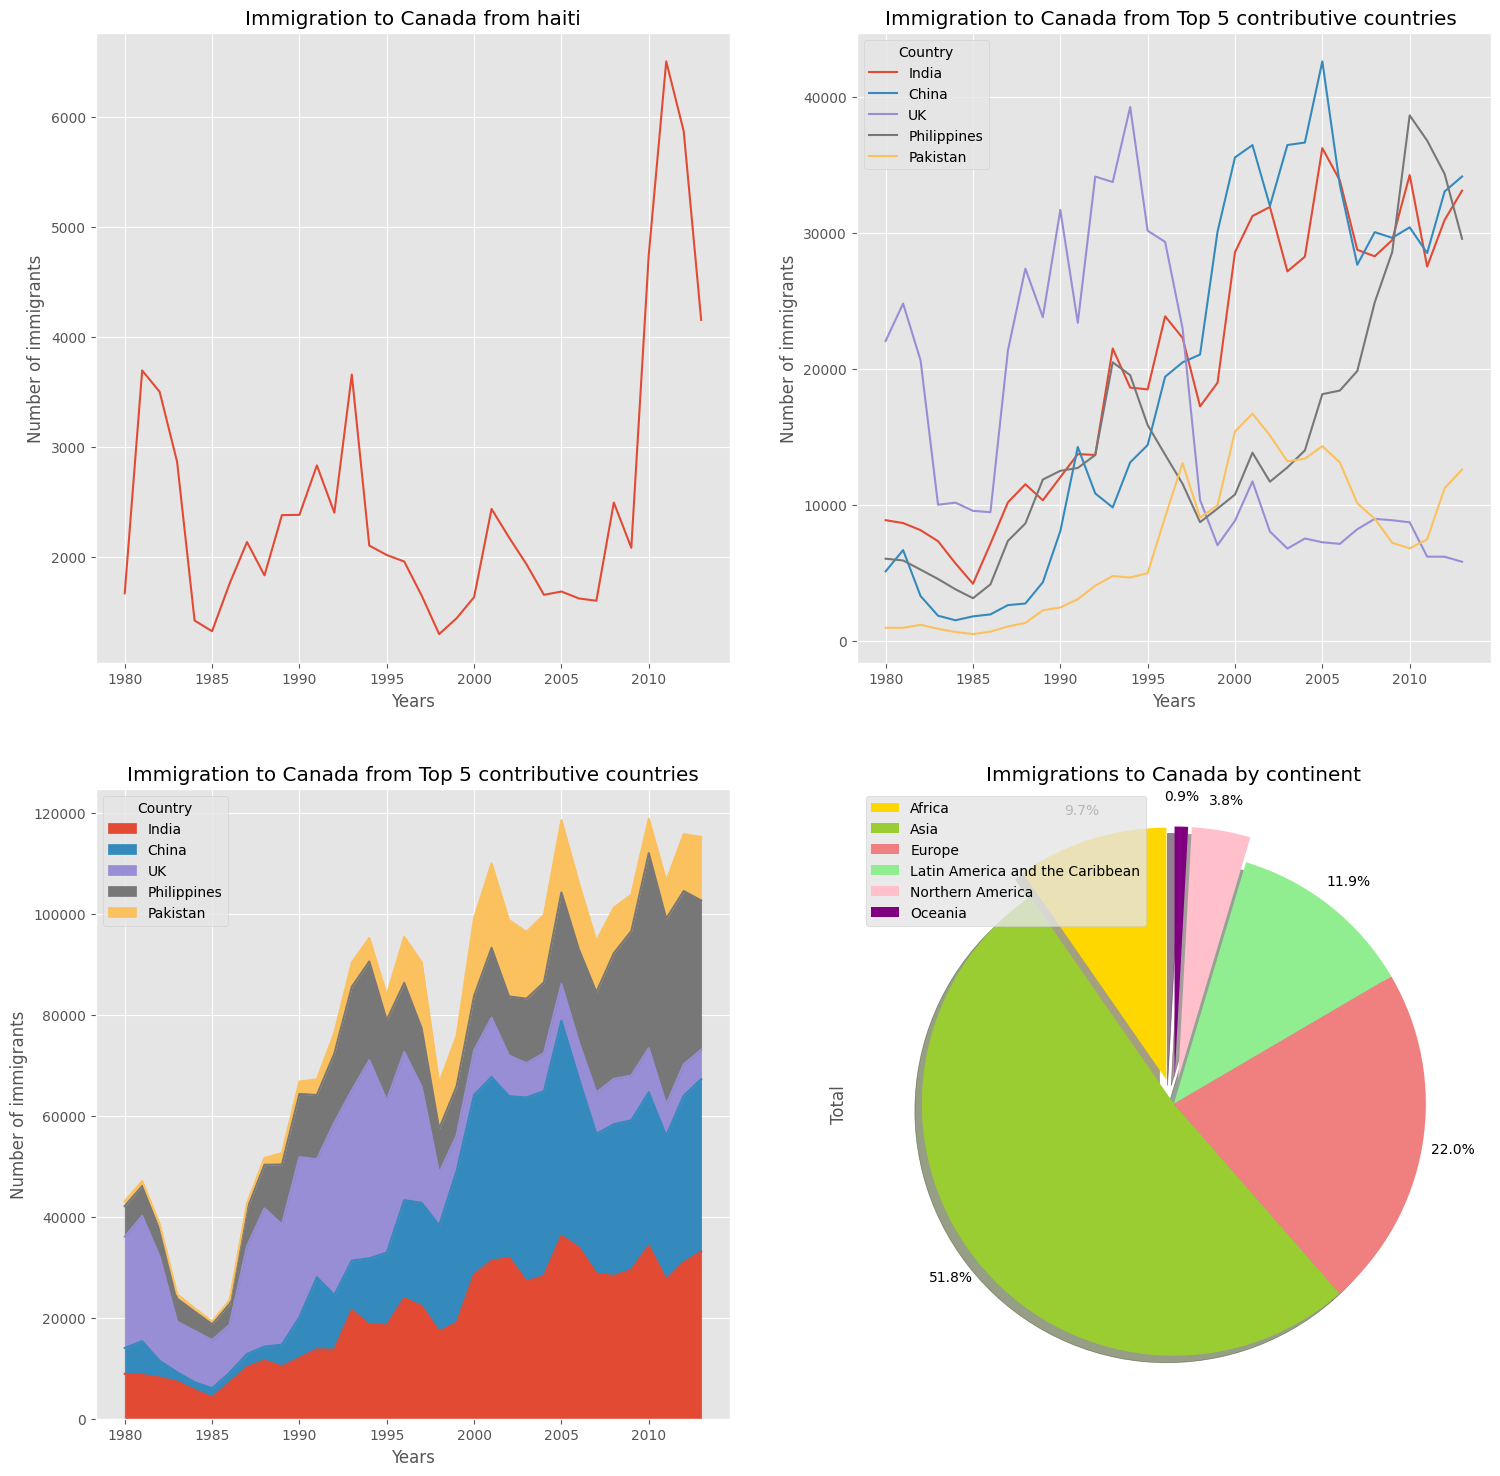

In [34]:
fig = plt.figure(figsize=(18,18)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 


plot_on_axes(haiti,'haiti',kind='line',ax=ax0)
plot_on_axes(top5_to_compare,'Top 5 contributive countries ',kind='line',ax=ax1)
plot_on_axes(top5_to_compare,'Top 5 contributive countries',kind='area',ax=ax2)
df_by_continent['Total'].plot(kind='pie',
                             autopct='%1.1f%%',
                             startangle=90,
                             shadow=True,
                             labels=None,
                             pctdistance=1.12,
                             colors=colors_list,
                             explode = explode_list)
ax3.set_title('Immigrations to Canada by continent')
ax3.legend(labels=df_by_continent.index,loc='upper left')

### Testing regression with seaborn

In [35]:
import seaborn as sns

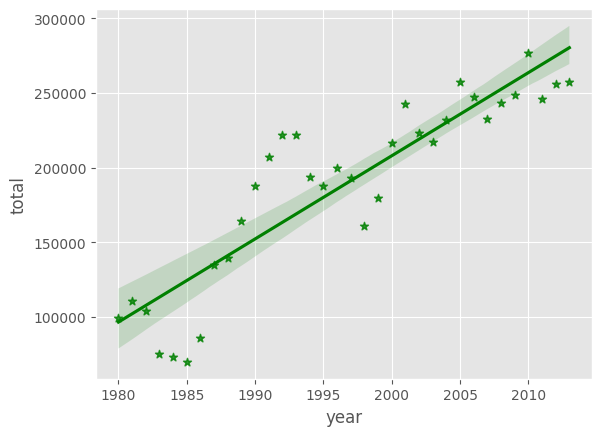

In [36]:
ax= sns.regplot(x='year', y='total', data=df_total,color='green',marker='*')

### Geospatial Data visualization with Folium

In [37]:
import folium

In [38]:
canada_map = folium.Map(location=[56.130, -106.35],zoom_start=4)#,tiles='Stamen Terrain'


In [39]:
ontario=folium.map.FeatureGroup()
ontario.add_child(
        folium.features.CircleMarker(
            [51.25, -85.32],radius=5,
            color='red',fill_color="Red"
        )
)

canada_map.add_child(ontario)
folium.Marker([51.25, -85.32],popup='Ontario').add_to(canada_map)

In [40]:
canada_map

In [50]:
#Loading geo-json data
import requests

URL='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'
r = requests.get(URL)
world = r.json()

print('GeoJSON file loaded')

GeoJSON file loaded


In [56]:
world_map = folium.Map(location=[0,0],zoom_start=2)
#choropleth map using the total immigration of each country to Canada from 1980 to 2013

#Transforming Country back to a column
data['Country'] = data.index

world_map.choropleth(
        geo_data= world,
        data = data,
        columns=['Country','Total'],
        key_on= 'feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Immigration to Canada'
)
world_map